In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.shape

(32581, 12)

In [4]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [7]:
df['person_emp_length'].min()

0.0

In [8]:
df['person_emp_length'].max()

123.0

In [9]:
df['person_emp_length'].mean()

4.789686296787225

In [10]:
df['person_emp_length'].median()

4.0

In [11]:
df=df[df['person_emp_length'] < 100]

<AxesSubplot:>

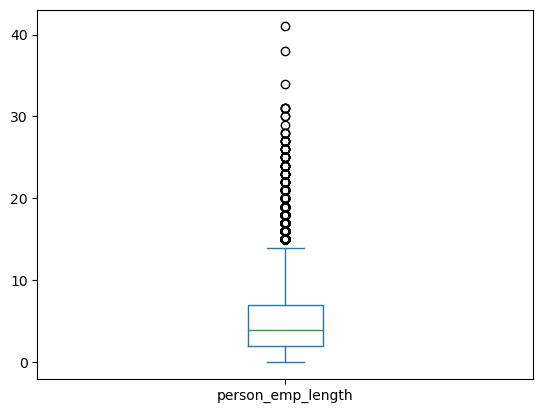

In [12]:

df['person_emp_length'].plot(kind='box')

In [14]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].median())

In [15]:
df['person_emp_length'].isnull().sum()

0

In [16]:
df['loan_int_rate'].min()

5.42

In [17]:
df['loan_int_rate'].max()

23.22

In [18]:
df['loan_int_rate'].mean()

11.039849839362459

In [19]:
df['loan_int_rate'].median()

10.99

In [20]:

df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [21]:
df['loan_int_rate'].isnull().sum()

0

In [22]:
df.duplicated().sum()

157

In [23]:
df.drop_duplicates(inplace=True)

# Univariate Analysis

<AxesSubplot:>

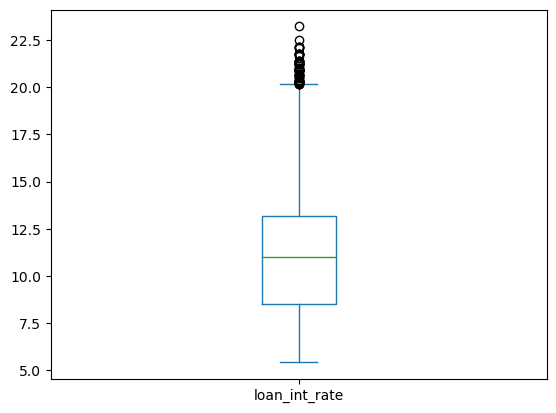

In [24]:
df['loan_int_rate'].plot(kind='box')

In [25]:
from scipy import stats
import matplotlib.pyplot as plt

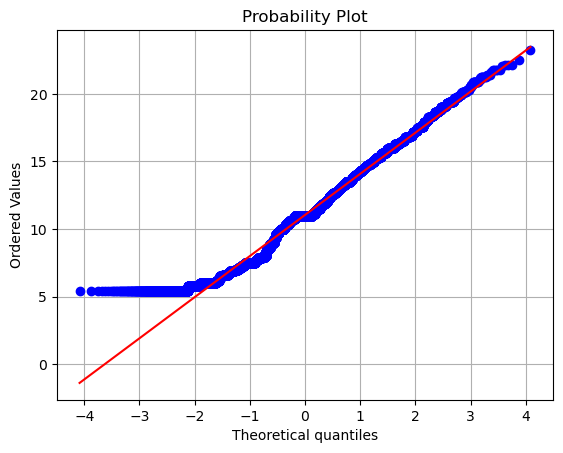

In [26]:
stats.probplot(df['loan_int_rate'],dist='norm',plot=plt)
plt.grid()

In [27]:
print(df['person_age'].min())
print(df['person_age'].max())
print(df['person_age'].mean())
print(df['person_age'].median())
print(df['person_age'].std())

20
144
27.759634598915216
26.0
6.366142558687687


In [28]:
clean_df=df[df['person_age'] < 100]

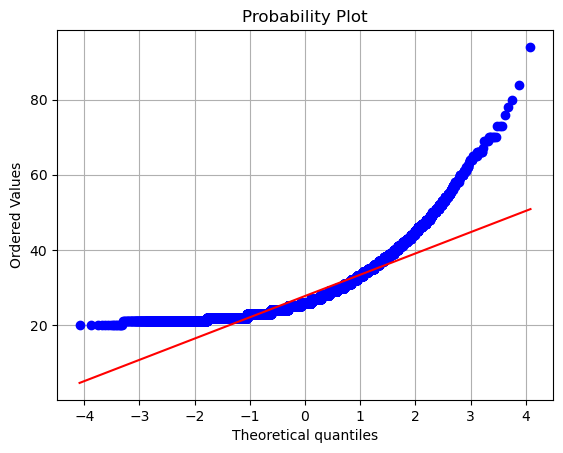

In [29]:
stats.probplot(clean_df['person_age'],dist='norm',plot=plt)
plt.grid()

<AxesSubplot:>

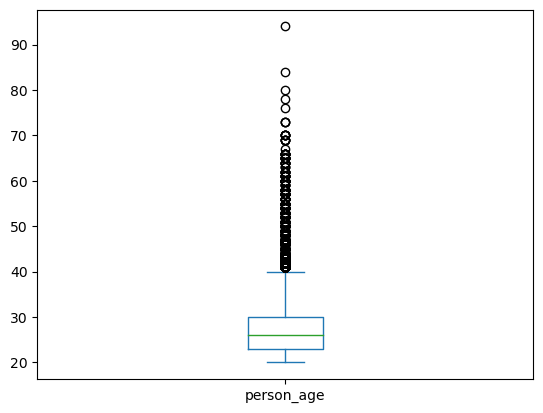

In [30]:
clean_df['person_age'].plot(kind='box')

In [31]:
age_df=df[df['person_age'] < 100]

<AxesSubplot:>

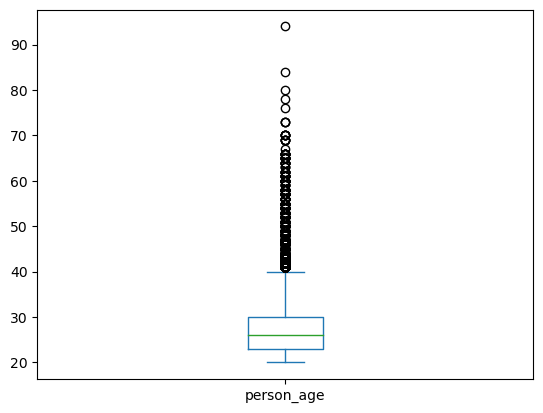

In [32]:
age_df['person_age'].plot(kind='box')

<AxesSubplot:>

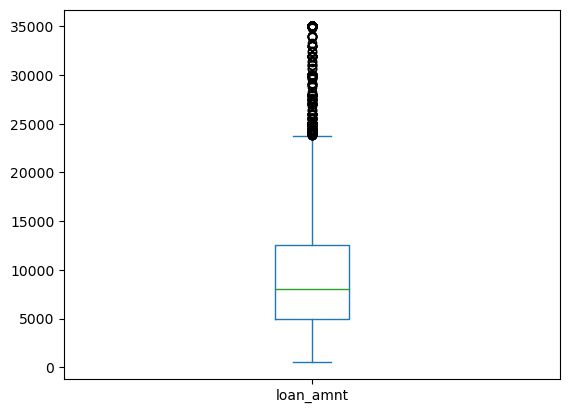

In [33]:

df['loan_amnt'].plot(kind='box')

In [34]:
#categorical

In [35]:
df['person_home_ownership'].value_counts()

RENT        16010
MORTGAGE    13020
OWN          2391
OTHER         106
Name: person_home_ownership, dtype: int64

<AxesSubplot:>

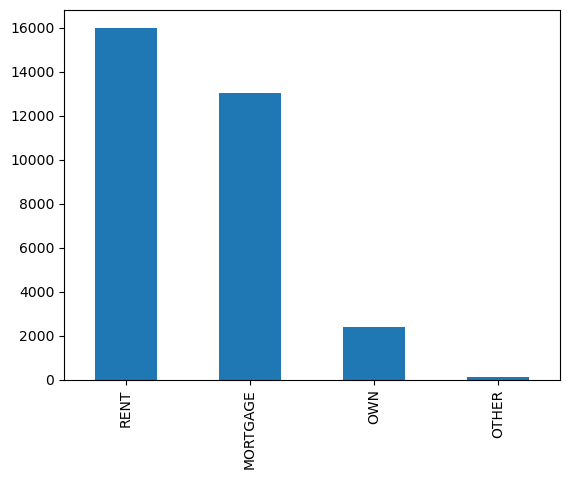

In [36]:
df['person_home_ownership'].value_counts().plot(kind='bar')

<AxesSubplot:>

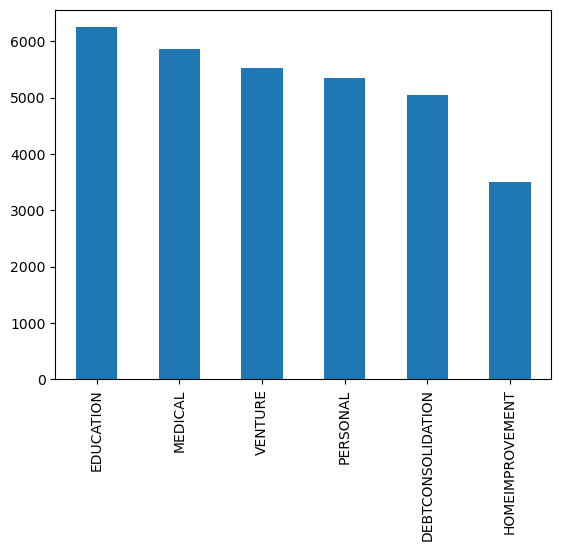

In [37]:
df['loan_intent'].value_counts().plot(kind='bar')

<AxesSubplot:>

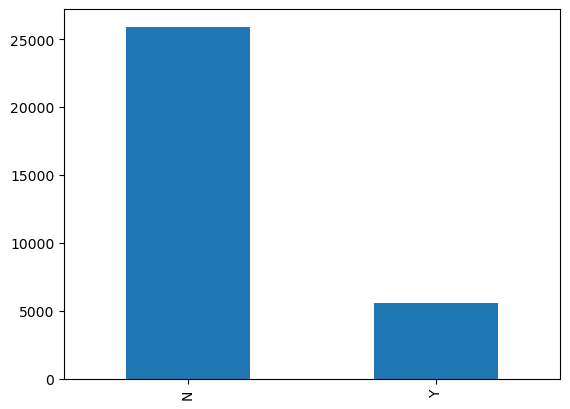

In [38]:
df['cb_person_default_on_file'].value_counts().plot(kind='bar')

<AxesSubplot:>

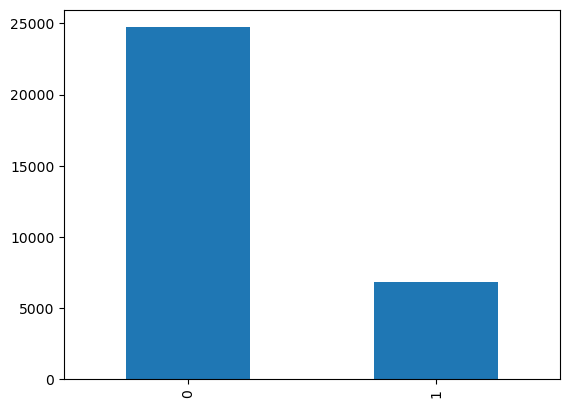

In [39]:
df['loan_status'].value_counts().plot(kind='bar')

<AxesSubplot:>

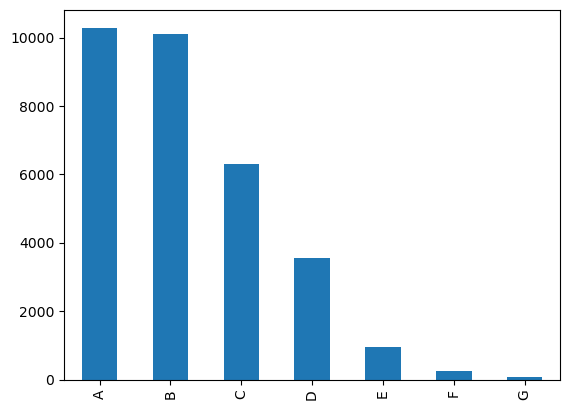

In [40]:
df['loan_grade'].value_counts().plot(kind='bar')

# Bivariate Analysis

<AxesSubplot:xlabel='person_age', ylabel='loan_status'>

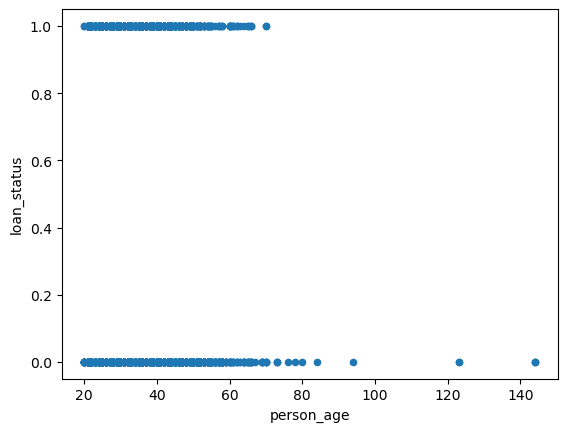

In [41]:
# NUM VS NUM
df.plot(kind='scatter',x='person_age',y='loan_status')

<AxesSubplot:xlabel='person_emp_length', ylabel='loan_status'>

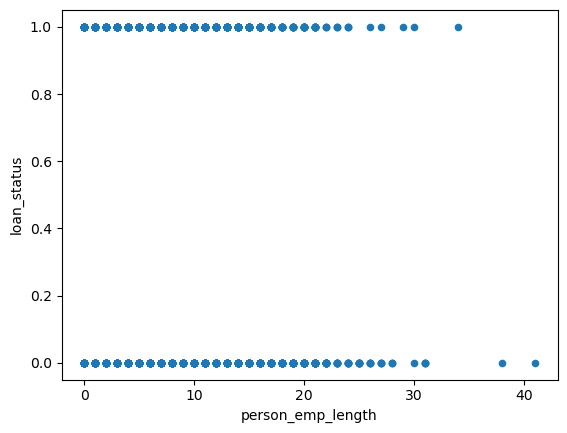

In [42]:
df.plot(kind='scatter',x='person_emp_length',y='loan_status')

In [43]:
# Num vs Cat

<AxesSubplot:title={'center':'person_emp_length'}, xlabel='cb_person_default_on_file'>

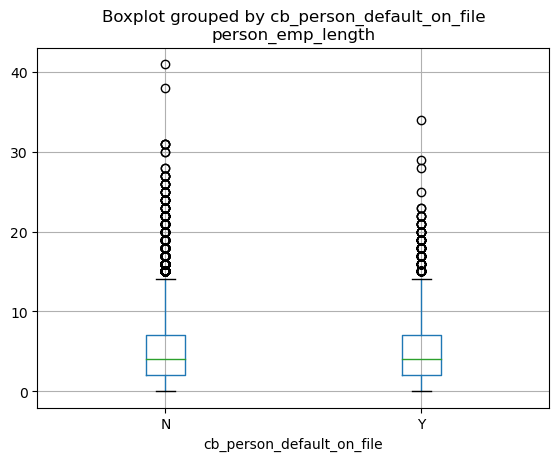

In [44]:
df.boxplot(by='cb_person_default_on_file',column='person_emp_length')

<AxesSubplot:title={'center':'cb_person_cred_hist_length'}, xlabel='cb_person_default_on_file'>

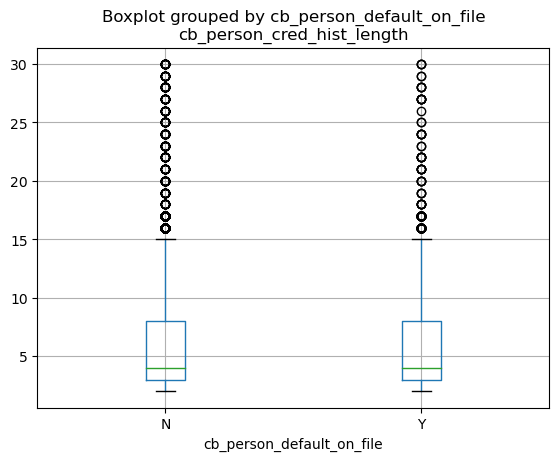

In [48]:
df.boxplot(by='cb_person_default_on_file',column='cb_person_cred_hist_length')

<AxesSubplot:title={'center':'loan_status'}, xlabel='cb_person_default_on_file'>

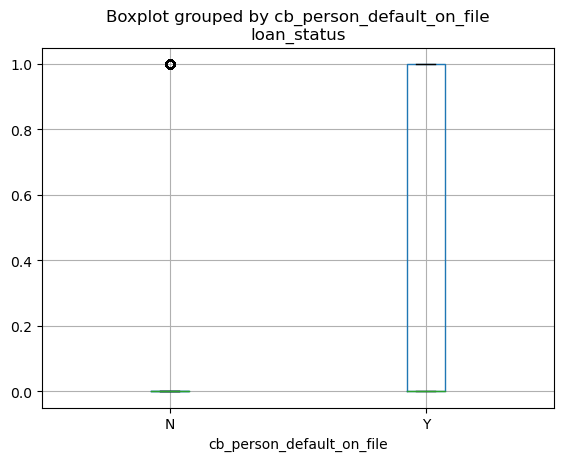

In [49]:
df.boxplot(by='cb_person_default_on_file',column='loan_status')

<AxesSubplot:title={'center':'loan_status'}, xlabel='loan_grade'>

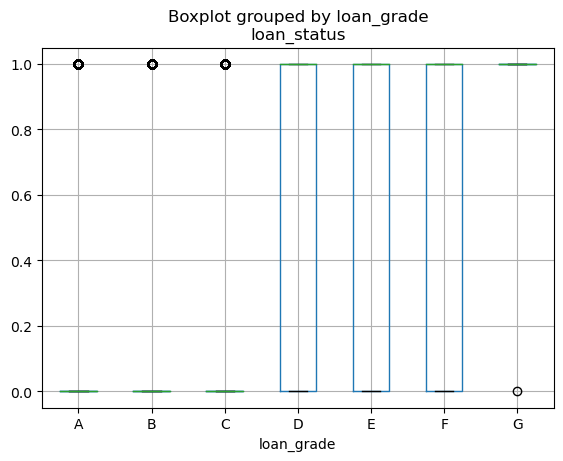

In [50]:
df.boxplot(by='loan_grade',column='loan_status')